# Pip installing Scikit learn

In [1]:
!pip install pandas scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importing pandas library & various modules from Scikit learn 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Doing basic EDA operations

In [5]:
dtype_mapping = {5: str, 6: str, 7: str}

In [6]:
df = pd.read_csv('twitter_training.csv', dtype=dtype_mapping)

In [8]:
df.head(10)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,352.0,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,8312.0,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,4371.0,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,4433.0,Google,Neutral,Now the President is slapping Americans in the...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,6273.0,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...,7925.0,MaddenNFL,Positive,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...,11332.0,TomClancysRainbowSix,Positive,"Rocket League, Sea of Thieves or Rainbow Six: ..."
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...,1107.0,AssassinsCreed,Positive,my ass still knee-deep in Assassins Creed Odys...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...,2069.0,CallOfDuty,Negative,FIX IT JESUS ! Please FIX IT ! What In the wor...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...,3185.0,Dota2,Positive,The professional dota 2 scene is fucking explo...


In [9]:
df.isnull().sum()

2401                                                                                                                                                                                                                                                      0
Borderlands                                                                                                                                                                                                                                               0
Positive                                                                                                                                                                                                                                                  0
im getting on borderlands and i will murder you all ,                                                                                                                                                                                               

In [16]:
df = df.dropna(subset=['im getting on borderlands and i will murder you all ,'])

# Declaring train & test variables for sentiment analysis 

In [17]:
train_data, test_data, train_labels, test_labels = train_test_split(df['im getting on borderlands and i will murder you all ,'], df['Positive'], test_size=0.2, random_state=42)

In [18]:
vectorizer = CountVectorizer()
train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)

In [19]:
classifier = MultinomialNB()
classifier.fit(train_vectors, train_labels)

MultinomialNB()

# Doing predictions & accuracy  

In [20]:
predictions = classifier.predict(test_vectors)

In [21]:
accuracy = accuracy_score(test_labels, predictions)
classification_report_result = classification_report(test_labels, predictions)

In [22]:
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_result)

Accuracy: 0.7536320021623083
Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.84      0.63      0.72      2624
    Negative       0.71      0.86      0.77      4463
     Neutral       0.83      0.64      0.72      3589
    Positive       0.72      0.82      0.77      4123

    accuracy                           0.75     14799
   macro avg       0.78      0.74      0.75     14799
weighted avg       0.77      0.75      0.75     14799



In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting bar plot to understand Sentiments

In [28]:
sentiment_counts = df['Positive'].value_counts()

C:\Users\dell\AppData\Local\Temp\ipykernel_5032\1109739825.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


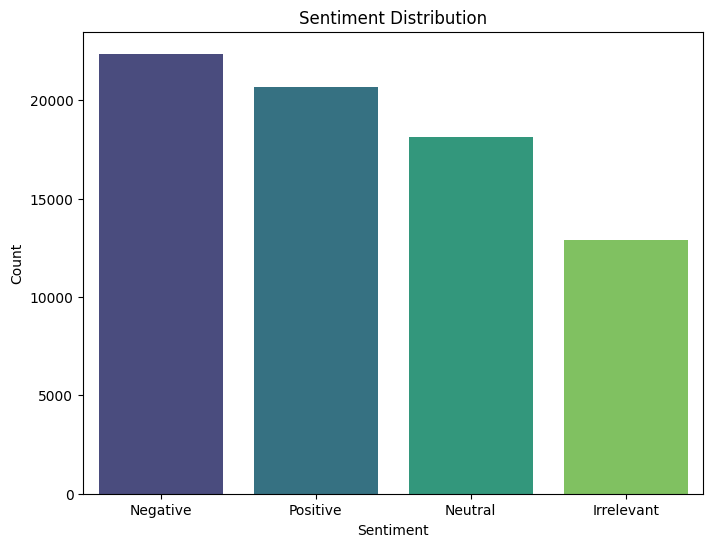

In [29]:
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [30]:
sentiment_counts = df.groupby(['Facebook', 'Irrelevant']).size().unstack(fill_value=0)

# Plotting count plot to understand sentiments w.r.t platforms

<Figure size 1200x800 with 0 Axes>

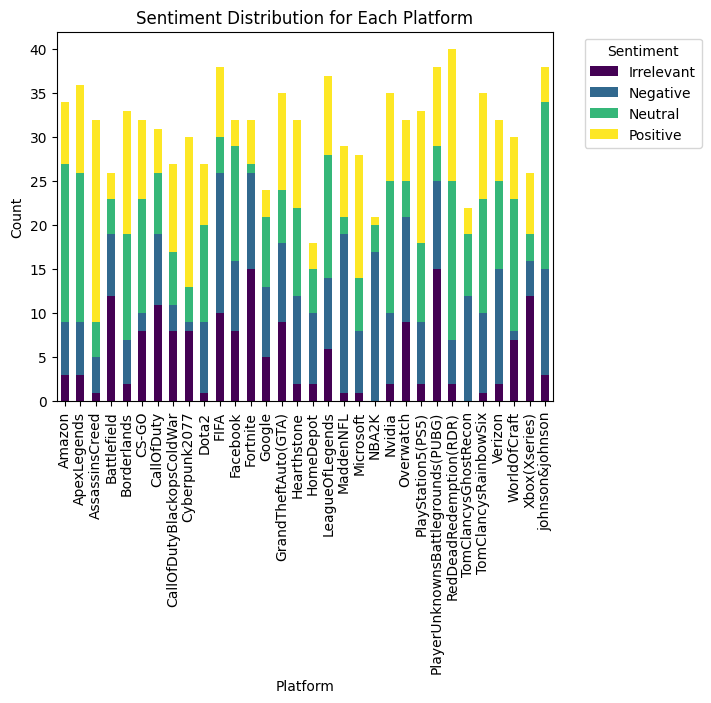

In [31]:
plt.figure(figsize=(12, 8))
sentiment_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Sentiment Distribution for Each Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()